In [10]:
from pathlib import Path
import matplotlib.pyplot as plt

import aind_hcr_qc.viz as viz

from aind_hcr_data_loader.hcr_dataset import (
    create_hcr_dataset, 
    create_hcr_dataset_from_config
)

# notebook reload
%load_ext autoreload
%autoreload 2

data_dir = Path('/root/capsule/data')
bucket_name = "aind-open-data"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load HCRDataset
Make sure processed datasets are attached to capsule

In [15]:
rounds_dict = {
      "R1": "HCR_767022_2025-07-03_13-00-00_processed_2025-07-18_09-27-44",
      "R2": "HCR_767022_2025-07-11_13-00-00_processed_2025-07-21_17-35-18",
      "R3": "HCR_767022_2025-07-18_13-00-00_processed_2025-07-21_17-35-38",
      "R4":"HCR_767022_2025-07-25_13-00-00_processed_2025-07-26_19-56-19",
      "R5":"HCR_767022_2025-07-31_13-00-00_processed_2025-08-01_16-55-47"
    }

rose_dataset = create_hcr_dataset(rounds_dict, 
                                  data_dir,
                                  mouse_id ="767022")


Could not load metadata for mouse 767022


In [16]:
rose_cxg_mixed = rose_dataset.create_cell_gene_matrix(unmixed=False)

Round R2 has these genes: ['Gad2' 'Vip' 'GFP' 'Slac17a7' 'Sst']
Round R3 has these genes: ['Ndnf' 'Reln' 'Pthlh' 'Tac2' 'Tac1']
Round R4 has these genes: ['gene_2' 'gene_3' 'gene_0' 'gene_1' 'gene_4']
Round R5 has these genes: ['Lamp5' 'Nos1' 'Pdyn' 'Pvalb' 'Cck']
Total duplicate genes found: 0


In [ ]:
# most expressed cells
cell_sums = rose_cxg_mixed.sum(axis=1)
sorted_indices = cell_sums.argsort()[::-1]
sorted_sums = cell_sums.iloc[sorted_indices]
sorted_sums.head(10)

cell_id
38304    7933.0
60139    7184.0
10903    7058.0
7839     6540.0
26021    6492.0
9165     6271.0
11319    6095.0
23564    6024.0
5539     6015.0
4171     5989.0
dtype: float64

# Plot segementation overview

## view multiple orientations

Loading mixed cxg for round R3


Number of cells in mixed_cxg for round R3: 34954
Extracting cell 7839 at centroid (z, y, x) = (639, 1566, 730)
Labels in chunk: [    0  5426  5437  5812  5899  5901  7269  7839  8843 10177 10283 10638
 10865 11859 13899 15237 16731 17028 17196 17441 18680 19367 19755]
z: 539 to 739, y: 1466 to 1666, x: 630 to 830
zarr shape: (1, 1, 1614, 5579, 5578)


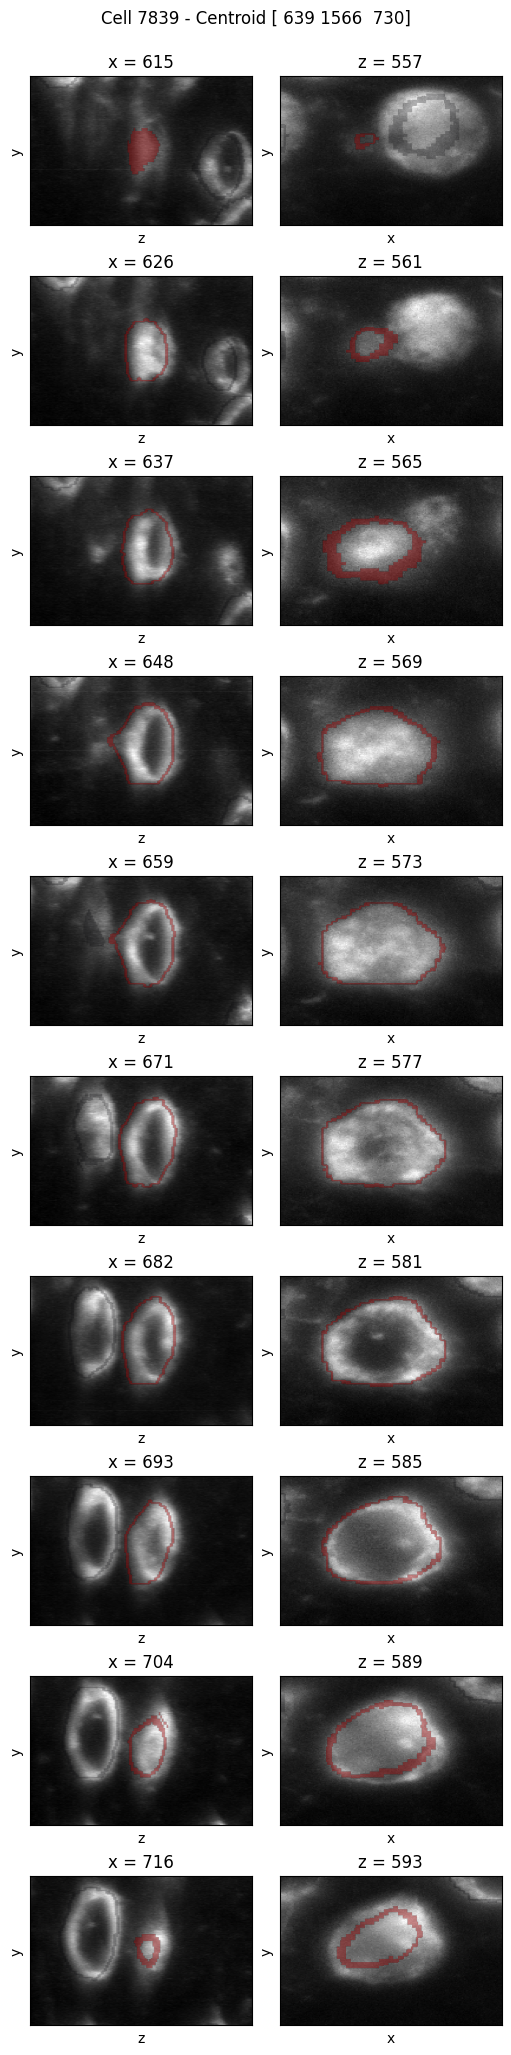

In [ ]:
viz.plot_single_cell_segmentation_overview(
    dataset=rose_dataset,
    round_n="R3",
    pyramid_level="0",
    plot_channel="405",
    plot_cell_id=7839,
    num_planes=10
    view="multi"
)
plt.show()

## view single orientation

Loading mixed cxg for round R3
Number of cells in mixed_cxg for round R3: 34954
Extracting cell 10903 at centroid (z, y, x) = (652, 5208, 674)
Labels in chunk: [    0  7244  7674  7816  8715  8860  9591 10903 11248 11786 12518 14686
 14692 15432 15897 17387 18692 18708 20716 21297 21624 22144 22248]
z: 552 to 752, y: 5108 to 5308, x: 574 to 774
zarr shape: (1, 1, 1614, 5579, 5578)
(195, 189)
(195, 189)
(195, 189)
(195, 189)
(195, 189)


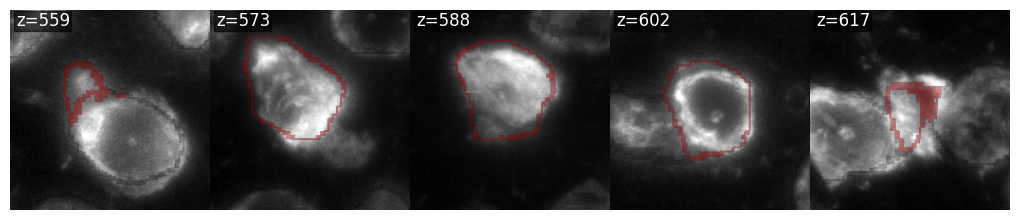

In [37]:
viz.plot_single_cell_segmentation_overview(
    dataset=rose_dataset,
    round_n="R3",
    pyramid_level="0",
    plot_channel="405",
    plot_cell_id=10903,
    num_planes=5,
    view="single"
)
plt.show()

# Plot gene expression - multi round


Loading cell info and segmentation data...
Loading mixed cxg for round R2
Number of cells in mixed_cxg for round R2: 34140
            cell_id        volume    x_centroid    y_centroid    z_centroid
count  34140.000000  3.414000e+04  34140.000000  34140.000000  34140.000000
mean   33309.584329  1.344638e+05   2883.387522   2792.674107    892.134095
std    18264.031526  7.583110e+04   1629.569352   1594.802354    201.766065
min      170.000000  3.200000e+01     66.000000     66.000000    363.000000
25%    17399.000000  9.368000e+04   1480.000000   1408.000000    734.000000
50%    33295.000000  1.350400e+05   2900.000000   2787.000000    923.000000
75%    49169.500000  1.775200e+05   4306.000000   4166.000000   1056.000000
max    65535.000000  2.241680e+06   5642.000000   5638.000000   1255.000000
Using reference channel 405 for segmentation overlay
Extracting cell volume for cell 23564...
Reference channel shape: (1, 1, 1554, 5579, 5587)
Extracting cell 23564 at centroid (z, y, x) = (8

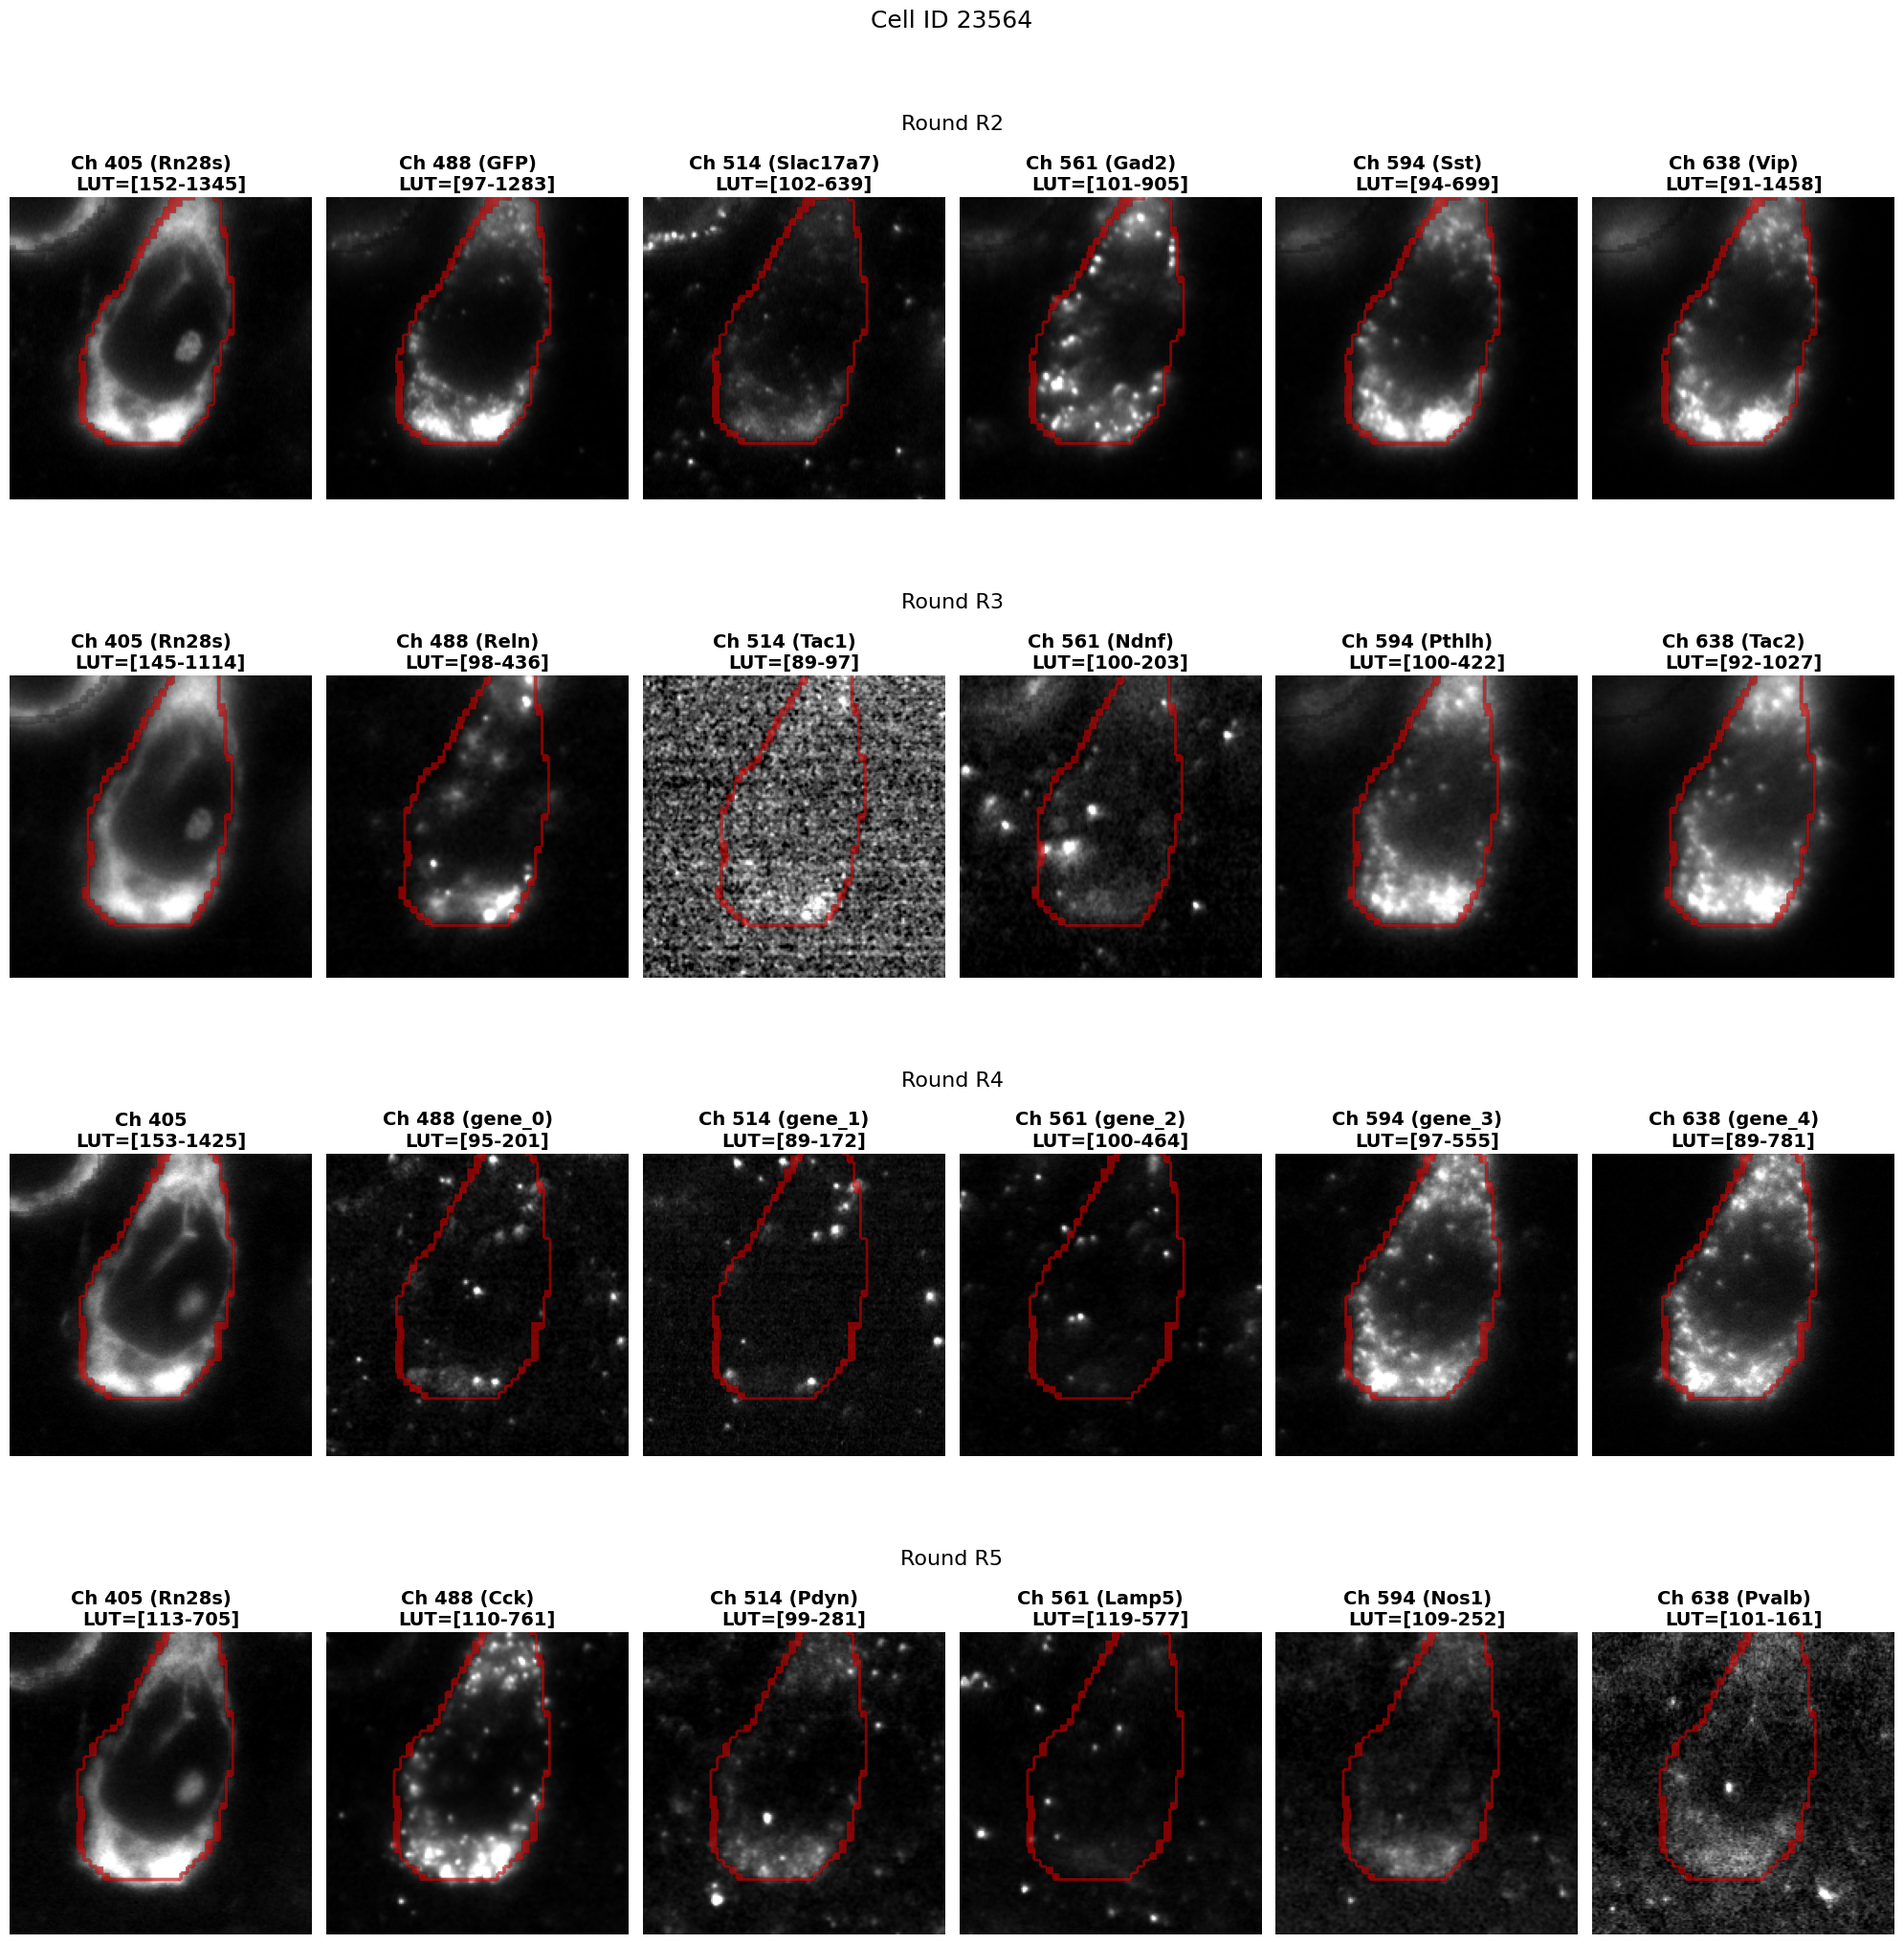

In [31]:
rounds = ["R2", "R3", "R4", "R5"] # skipped R1, bad in Rose mouse
pyramid_level = "0"
plot_cell_id = 23564

viz.plot_single_cell_expression_all_rounds(plot_cell_id, rose_dataset, "0", rounds, verbose=False)
plt.show()
